In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output


In [2]:
def show_img(img, bigger=False):
    if bigger:
        plt.figure(figsize=(15,15))
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [3]:
def resize_img(img, scale_percent):

    width = int(img.shape[1] * scale_percent / 100) # 縮放後圖片寬度
    height = int(img.shape[0] * scale_percent / 100) # 縮放後圖片高度
    dim = (width, height) # 圖片形狀 
    resize_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)  
    
    return resize_img

Image1:


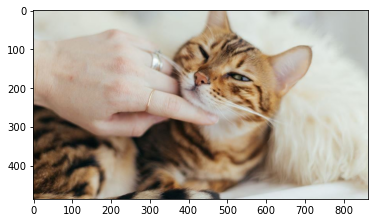

Image2:


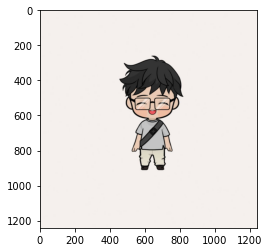

resize Image2:


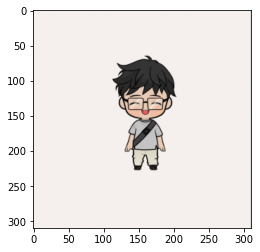

floodFill:


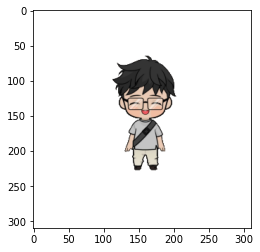

mask:


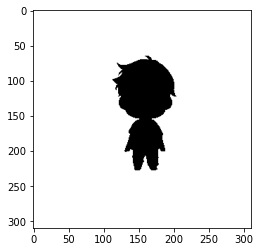

Use mask to crop origin image1:


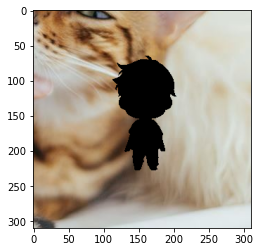

mask_inv:


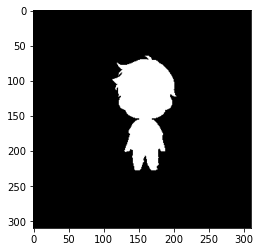

Take element from image2:


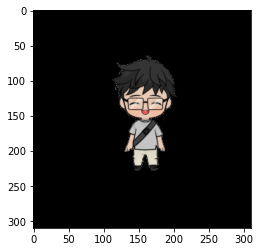

result image:


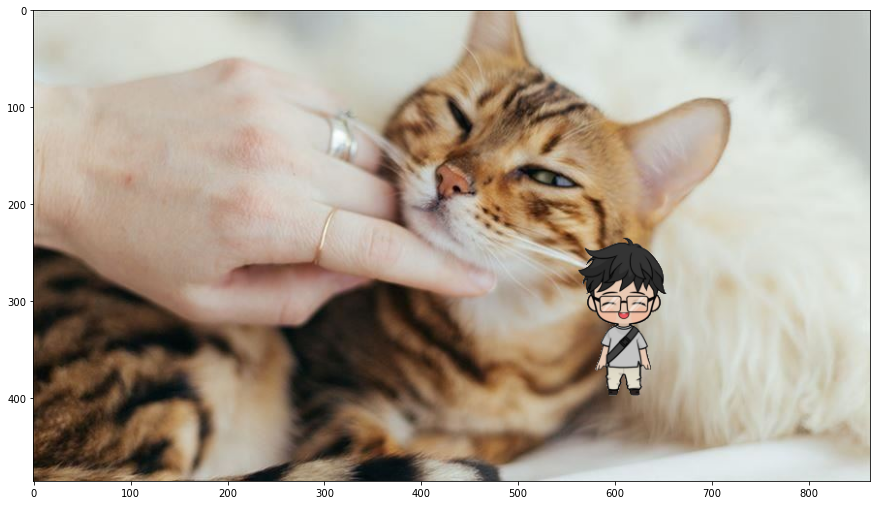

In [4]:
# Load two images
file_name = "./testdata/cat.jpg"
img1 = cv2.imread(file_name)
print("Image1:")
show_img(img1)

file_name = "./testdata/me.jpg"
img2 = cv2.imread(file_name)
print("Image2:")
show_img(img2)
img2 = resize_img(img2, scale_percent = 25) # 要放大縮小幾%
print("resize Image2:")
show_img(img2)

copyIma = img2.copy()
h, w = img2.shape[:2]
mask = np.zeros([h+2, w+2], np.uint8)
cv2.floodFill(copyIma, mask, (30, 30), (255, 255, 255), (100, 100, 100), (50, 50, 50), cv2.FLOODFILL_FIXED_RANGE)  

print("floodFill:")
show_img(copyIma)

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(copyIma,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 254, 255, cv2.THRESH_BINARY)

print("mask:")
show_img(mask)

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
x = 450 
y = 170
roi = img1[y:y+rows, x:x+cols]

print("Use mask to crop origin image1:")
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask = mask)
show_img(img1_bg)

print("mask_inv:")
mask_inv = cv2.bitwise_not(mask)
show_img(mask_inv)

print("Take element from image2:")
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask = mask_inv)
show_img(img2_fg)

print("result image:")
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[y:y+rows, x:x+cols] = dst

show_img(img1, bigger=True)


# Reference

https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html
